In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import tarfile
import urllib.request
import math

In [10]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

In [11]:
house_data = load_housing_data()

In [14]:
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
house_data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [18]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [17]:
house_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [19]:
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

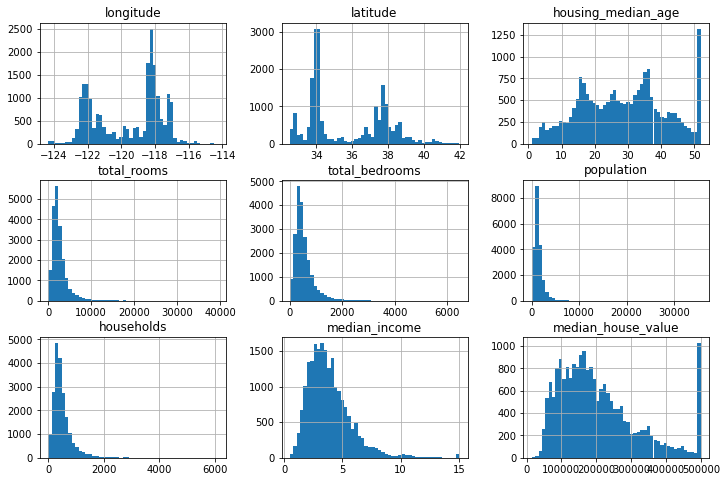

In [20]:
house_data.hist(bins=50, figsize=(12,8))

In [21]:
X = house_data.drop(['median_house_value'], axis = 1)
y = house_data[['median_house_value']]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [45]:
house_data.median_income.isnull().sum()

0

In [48]:
house_data['income_cat']= pd.cut(house_data['median_income'],
                                 bins = [0., 1.5, 3.0, 4.5, 6.0, math.inf],
                                 labels=[1,2,3,4,5]
                                )

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

(array([ 822.,    0., 6581.,    0.,    0., 7236.,    0., 3639.,    0.,
        2362.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

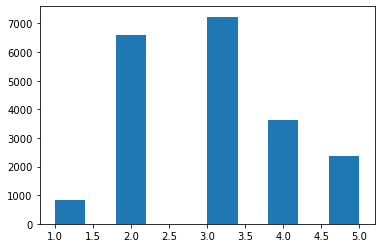

In [50]:
plt.hist(house_data['income_cat'])

In [51]:
house_data.income_cat.isnull().sum()

0

### Stratified Data Splitting

In [42]:
# income_cat_median = hou
# house_data.income_cat.fillna(house_data.income_cat.median())
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20628 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [52]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(house_data, stratify=house_data['income_cat'], test_size=0.2)

In [55]:
train_set[['income_cat']].value_counts() / len(train_set)

income_cat
3             0.350594
2             0.318859
4             0.176296
5             0.114462
1             0.039789
Name: count, dtype: float64

In [56]:
for set_ in [train_set, test_set]:
    set_.drop(['income_cat'], axis=1, inplace=True)

In [57]:
train_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### Visualizing the data

In [58]:
housing = train_set.copy()

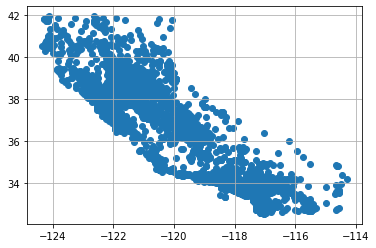

In [61]:
plt.scatter(data = housing, x = 'longitude', y = 'latitude')
plt.grid()
plt.show()

# this indeed look like california

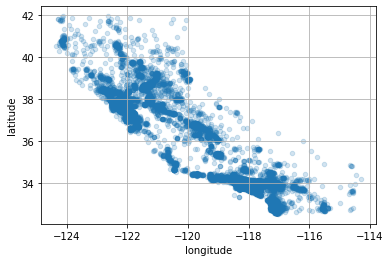

In [108]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha= 0.2, grid = True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

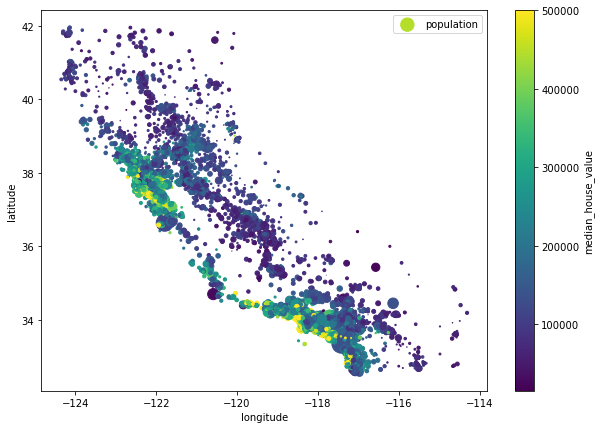

In [84]:
housing.plot(kind = "scatter", x = 'longitude', y = 'latitude', 
             s = housing['population']/ 100, 
             label = "population", 
             c = 'median_house_value', 
             # cmap = "jet",
             colorbar = True,
             sharex= False, 
             figsize = (10, 7)
            )
plt.show

# house value

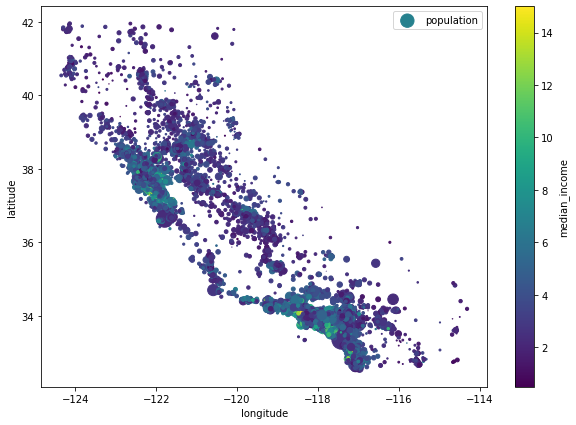

In [110]:
housing.plot(kind = "scatter", x = 'longitude', y = 'latitude', 
             s = housing['population']/ 100, 
             label = "population", 
             c = 'median_income', 
             # cmap = plt.cm.jet,
             colorbar = True,
             sharex= False, 
             figsize = (10, 7)
            )
plt.show()


In [99]:
temp = housing.copy()
temp.drop(['ocean_proximity'], axis = 1, inplace=True)
corr_matrix = temp.corr()

In [101]:
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689651
total_rooms           0.131511
housing_median_age    0.105997
households            0.062816
total_bedrooms        0.046362
population           -0.028366
longitude            -0.043639
latitude             -0.146462
Name: median_house_value, dtype: float64

In [105]:
housing['rooms_per_house'] = housing['total_rooms']/ housing['households']
housing['bedroom_ration'] = housing['total_bedrooms'] / house_data['total_rooms']
housing['people_per_house'] = housing['population'] / housing['households']

In [106]:
temp = housing.copy()
temp.drop(['ocean_proximity'], axis = 1, inplace=True)
corr_matrix = temp.corr()

In [107]:
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689651
rooms_per_house       0.152043
total_rooms           0.131511
housing_median_age    0.105997
households            0.062816
total_bedrooms        0.046362
people_per_house     -0.021899
population           -0.028366
longitude            -0.043639
latitude             -0.146462
bedroom_ration       -0.255518
Name: median_house_value, dtype: float64

### Cleaning Data

#### Numerical Data

In [111]:
housing = train_set.drop(['median_house_value'], axis = 1)
housing_label = train_set['median_house_value']

In [112]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [113]:
number_cols = [col for col in housing.columns if housing[col].dtype in ['int64', 'float64']]

In [114]:
housing_num = housing[number_cols]
imputer.fit(housing_num)

X = imputer.transform(housing_num)

In [115]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = housing_num.index)

#### Categorial Data

In [116]:
housing_cat = house_data[['ocean_proximity']]

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
 
housing_cat_1hot = ohe.fit_transform(housing_cat)

df_output = pd.DataFrame(housing_cat_1hot, columns= ohe.get_feature_names_out())

In [117]:
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0
